In [3]:
# Importing all necessary libraries for data handling, visualization, and machine learning

import numpy as np                   # For numerical operations
import pandas as pd                  # For handling datasets in tabular form
import matplotlib.pyplot as plt      # For creating plots and graphs
import seaborn as sb                 # For advanced statistical visualizations

# ML-related imports
from sklearn.model_selection import train_test_split    # To split data into training & testing sets
from sklearn.preprocessing import MinMaxScaler          # To scale numerical values between 0 and 1
from sklearn import metrics                             # For model evaluation metrics
from sklearn.svm import SVC                             # Support Vector Classifier (ML algorithm)
from xgboost import XGBClassifier                       # XGBoost Classifier (ML algorithm)
from sklearn.linear_model import LogisticRegression     # Logistic Regression (ML algorithm)

# Ignore warning messages for cleaner output
import warnings
warnings.filterwarnings('ignore')

In [4]:
# loading dataset
df = pd.read_csv("C://Users//HP//Downloads//winequalityN.csv")
print(df.head()) # Displaying the first 5 rows of the dataset for quick inspection

    type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0  white            7.0              0.27         0.36            20.7   
1  white            6.3              0.30         0.34             1.6   
2  white            8.1              0.28         0.40             6.9   
3  white            7.2              0.23         0.32             8.5   
4  white            7.2              0.23         0.32             8.5   

   chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0      0.045                 45.0                 170.0   1.0010  3.00   
1      0.049                 14.0                 132.0   0.9940  3.30   
2      0.050                 30.0                  97.0   0.9951  3.26   
3      0.058                 47.0                 186.0   0.9956  3.19   
4      0.058                 47.0                 186.0   0.9956  3.19   

   sulphates  alcohol  quality  
0       0.45      8.8        6  
1       0.49      9.5        6  
2       0.4

In [5]:
df.tail() # Displaying the last 5 rows of the dataset for quick inspection

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,6
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
6496,red,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [6]:
df.shape # show  number of rows and columns in dataset

(6497, 13)

In [7]:
df.info() # show how much rows and columns are there in dataset their datatype, null values and memory usage

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [8]:
df.describe().T # checking basic statistics summary of dataset

,count,mean,std,min,25%,50%,75%,max
fixed acidity,6487.0,7.216579,1.296750,3.80000,6.40000,7.00000,7.70000,15.90000
volatile acidity,6489.0,0.339691,0.164649,0.08000,0.23000,0.29000,0.40000,1.58000
citric acid,6494.0,0.318722,0.145265,0.00000,0.25000,0.31000,0.39000,1.66000
residual sugar,6495.0,5.444326,4.758125,0.60000,1.80000,3.00000,8.10000,65.80000
chlorides,6495.0,0.056042,0.035036,0.00900,0.03800,0.04700,0.06500,0.61100
free sulfur dioxide,6497.0,30.525319,17.749400,1.00000,17.00000,29.00000,41.00000,289.00000
total sulfur dioxide,6497.0,115.744574,56.521855,6.00000,77.00000,118.00000,156.00000,440.00000
density,6497.0,0.994697,0.002999,0.98711,0.99234,0.99489,0.99699,1.03898
pH,6488.0,3.218395,0.160748,2.72000,3.11000,3.21000,3.32000,4.01000
sulphates,6493.0,0.531215,0.148814,0.22000,0.43000,0.51000,0.60000,2.00000


In [9]:
df.isnull().sum() # cheking for null values in each column

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [10]:
# Handling missing values
# fill missing values with mean
df['fixed acidity']=df['fixed acidity'].fillna(df['fixed acidity'].mean()) 
df['volatile acidity']=df['volatile acidity'].fillna(df['volatile acidity'].median()
df['citric acid']=df['citric acid'].fillna(df['citric acid'].median())

In [15]:
df['residual sugar']=df['residual sugar'].fillna(df['residual sugar'].mean())

In [16]:
df['chlorides']=df['chlorides'].fillna(df['chlorides'].mean())

In [18]:
df['pH']=df['pH'].fillna(df['pH'].mean())

In [19]:
df['sulphates']=df['sulphates'].fillna(df['sulphates'].mean())

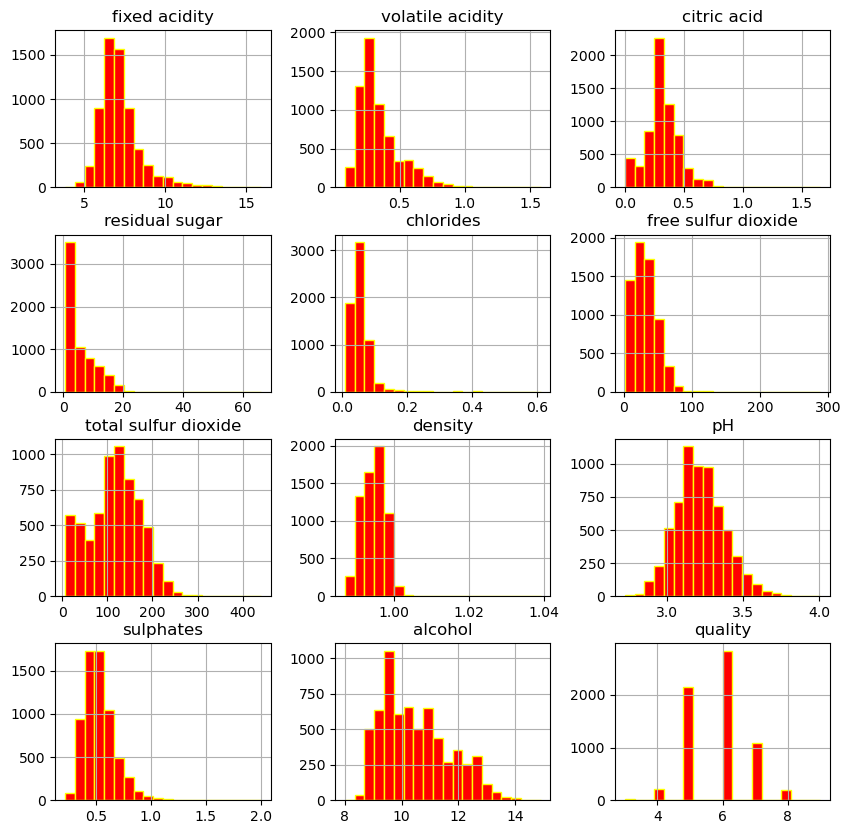

In [21]:
# 📊 Plotting histograms for all numerical columns in the dataset
df.hist(bins=20, figsize=(10, 10),color='red',edgecolor='yellow')
plt.show()

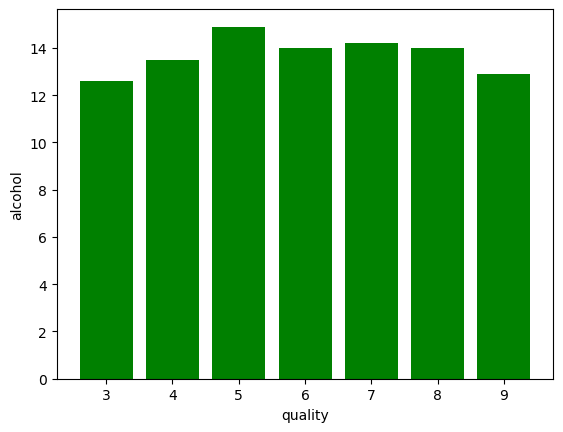

In [22]:
# 📊 Creating a bar chart to compare wine quality with alcohol content
plt.bar(df['quality'], df['alcohol'],color='green')
plt.xlabel('quality')
plt.ylabel('alcohol')
plt.show()

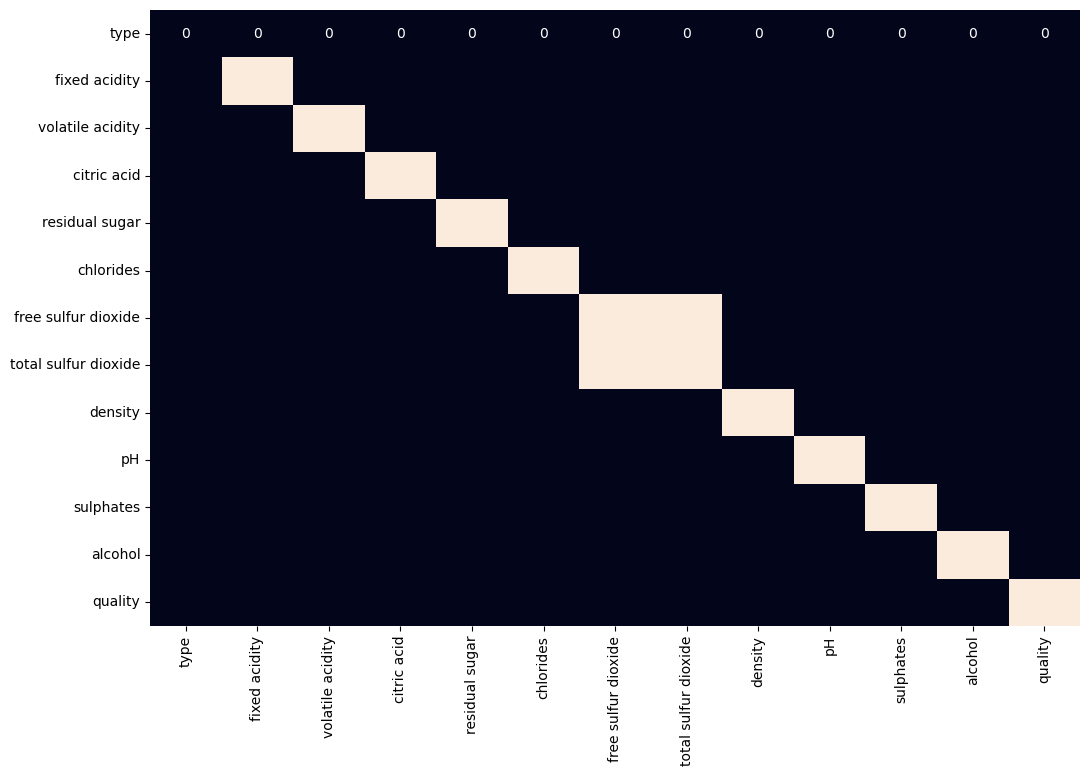

In [23]:
# Convert 'object' columns to numerical if they represent numbers
for col in df.columns:
    if df[col].dtype == 'object':
        try:
            df[col] = pd.to_numeric(df[col], errors='coerce')  # Convert to numeric, replace non-convertibles with NaN
        except:
            pass  # Skip columns that cannot be converted

plt.figure(figsize=(12, 8))
sb.heatmap(df.corr() > 0.7, annot=True, cbar=False)
plt.show()

In [24]:
# From the above heat map we can conclude that the 'total sulphur dioxide' and 'free sulphur dioxide' are highly correlated features so, we will remove them.
df = df.drop('total sulfur dioxide', axis=1)

In [25]:
# Create a new column 'best quality' where wines with quality > 5 are labeled as 1 (good quality) 
# and wines with quality <= 5 are labeled as 0 (not good quality)
df['best quality'] = [1 if x > 5 else 0 for x in df.quality]

In [26]:
# Replace string values in the DataFrame: 'white' → 1 and 'red' → 0, update the DataFrame in place
df.replace({'white': 1, 'red': 0}, inplace=True)

In [27]:
# 🎯 Separate features (input variables) and target (output variable)
features = df.drop(['quality', 'best quality'], axis=1)
target = df['best quality']
# ✂ Split dataset into training and testing sets
xtrain, xtest, ytrain, ytest = train_test_split(
	features, target, test_size=0.2, random_state=40)

# Impute missing values after splitting
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')  # Or another strategy like 'median'
xtrain = imputer.fit_transform(xtrain) # Fit the imputer on the training set and transform it
xtest = imputer.transform(xtest) # Use the same transformation on the test set (no fitting here) 
# 📏 Check the shapes of the resulting training and test sets
xtrain.shape, xtest.shape

((5197, 10), (1300, 10))

In [28]:
# Normalize feature values to a range [0, 1] using Min-Max Scaling
norm = MinMaxScaler()
xtrain = norm.fit_transform(xtrain) # Fit the scaler on the training data (learn min & max) and transform it
xtest = norm.transform(xtest) # Use the same scaling parameters (from training data) to transform test data

In [29]:
# 🤖 Define a list of machine learning models to train
models = [LogisticRegression(), XGBClassifier(), SVC(kernel='rbf')]
# 🔄 Loop through each model, train it, and evaluate performance
for i in range(3):
    models[i].fit(xtrain, ytrain)

    print(f'{models[i]} : ')
    print('Training Accuracy : ', metrics.roc_auc_score(ytrain, models[i].predict(xtrain)))
    print('Validation Accuracy : ', metrics.roc_auc_score(
        ytest, models[i].predict(xtest)))
    print()

LogisticRegression() : 
Training Accuracy :  0.6975101024661644
Validation Accuracy :  0.6855058693719925

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...) : 
Training Accuracy :  0.9765884007600941
Validation Accuracy :  0.804308292722796

SVC() : 
Training Accuracy :  0.720320252557672

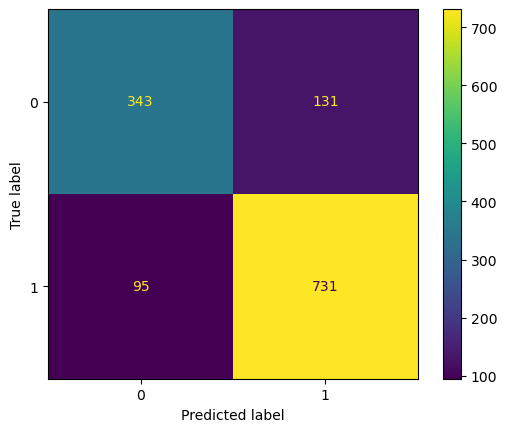

In [32]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# 📊 Create a confusion matrix for the second trained model (models[1] → XGBClassifier in this case)
cm = confusion_matrix(ytest, models[1].predict(xtest))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=models[1].classes_) # Assuming your model has a 'classes_' attribute
disp.plot()
plt.show()

In [31]:
# Print a detailed classification report including precision, recall, f1-score, and support
print(metrics.classification_report(ytest,
                                    models[1].predict(xtest)))

              precision    recall  f1-score   support

           0       0.78      0.72      0.75       474
           1       0.85      0.88      0.87       826

    accuracy                           0.83      1300
   macro avg       0.82      0.80      0.81      1300
weighted avg       0.82      0.83      0.82      1300



In [35]:
import joblib
joblib.dump(models, "wine_quality1_model.pkl")
print("Model saved successfully!")


Model saved successfully!
